## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier,plot_tree)
from sklearn import tree
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Loan_Modelling.csv")
df=data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.head(10)# checking top 10 records to see the overview of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
df.info() #data types of a data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum() # check for null values

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
df.shape # how many rows and columns

(5000, 14)

In [ ]:
df.describe().T # statistical summary
#this clearly indicates that experience column has some wrong data- min cannot contain negative values

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.nunique() # no of unique values in every column
# this clearly indicates that ID column has all 5000 rows and are unique

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


In [ ]:
df.drop(columns=['ID'],axis=1,inplace=True) #dropping the ID column as it doesnt have an impact on data set

In [ ]:
df.head() # to verify if it has been dropped

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# from the output above, there are 47 unique records in the experience column so printing out here
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
df['CreditCard'].unique()

array([0, 1])

In [ ]:
df.loc[df['Experience'] == -1, 'Experience'] = 1
df.loc[df['Experience'] == -2, 'Experience'] = 2
df.loc[df['Experience'] == -3, 'Experience'] = 3
# In the above code, we replaced all rows of the data that has experience has -1 with 1 and -2 with 2 and -3 with 3

In [ ]:
df[df["Experience"] < 0]['Experience'].count()
# verifying if there are any rows with less than 0 for experience-

np.int64(0)

In [ ]:
df["ZIPCode"].nunique()

467

In [ ]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
df["ZIPCode"].str[0:2].nunique()
df["ZIPCode"] = df["ZIPCode"].str[0:2]


In [ ]:
category_columns = ["ZIPCode","Education","Personal_Loan","Securities_Account","CD_Account","Online","CreditCard"]
df[category_columns]=df[category_columns].astype('category')

In [ ]:
df.info() # to check if the datatype got changed to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

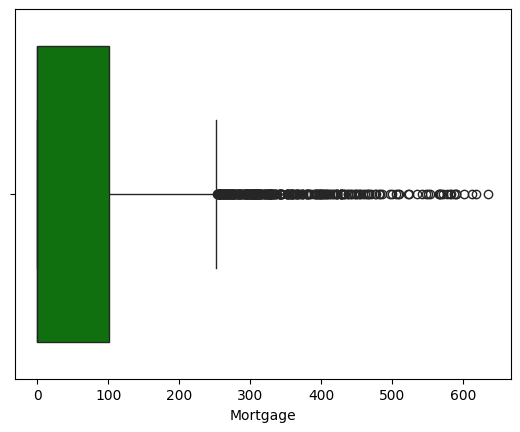

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=df,x='Mortgage',color='green')
plt.show()
#This clearly indicates it is a right skewed data set and there are outliers in the data

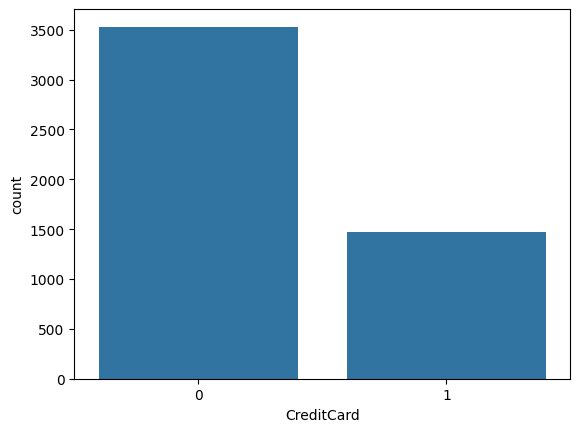

In [ ]:
sns.countplot(data=df,x='CreditCard')
plt.show()
#this count plot is used to understand how many customers have credit cards from other bank- there are about 1500 records that has credit cards

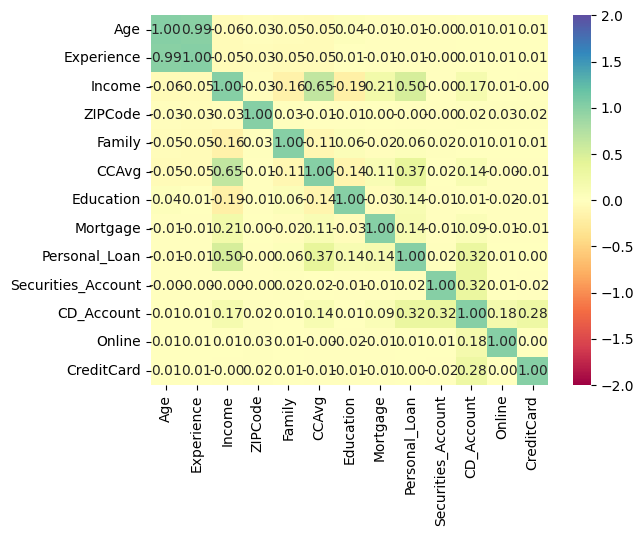

In [ ]:
sns.heatmap(df.corr(numeric_only=False), annot=True, vmin=-2, vmax=2, fmt=".2f",cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()
#from the heatmap below, we can see that income, CCAvg and CD_Amount are positively correlated, which makes sense
#Also age and experience are correlated perfectly

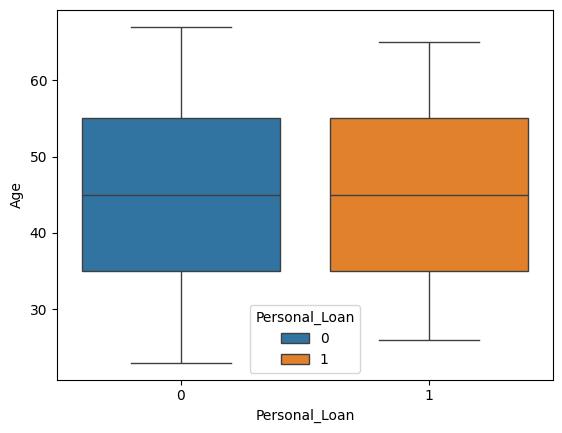

In [ ]:
sns.boxplot(data=df,y='Age',x='Personal_Loan',hue='Personal_Loan')
plt.show()
#from the below boxplot we can see that customers have availed the loan and some customers did not avail the loan at the same age- Age has not played a major role

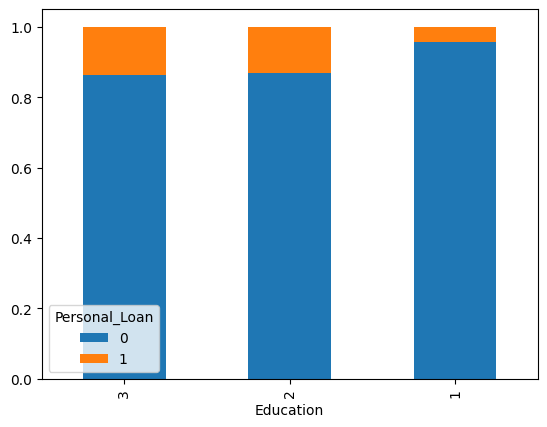

In [ ]:
#from the below bar plot, we can see the percentage of loan availed in each education category.
output = pd.crosstab(df['Education'], df['Personal_Loan'], normalize="index").sort_values(
        by=1, ascending=False)
output.plot(kind='bar', stacked=True)
plt.show()

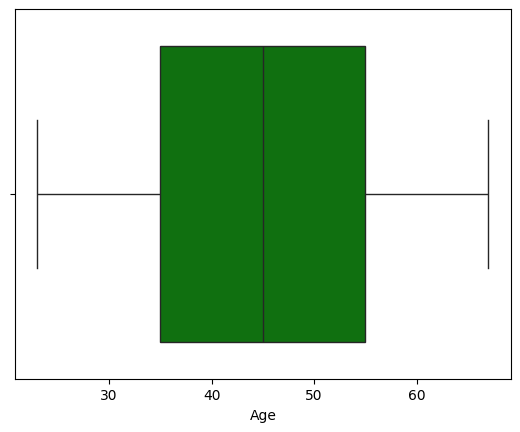

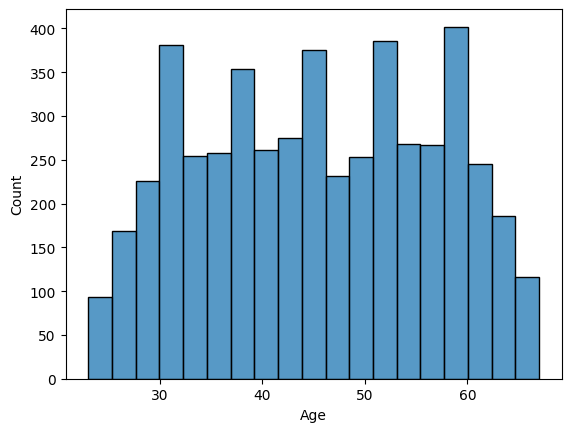

In [ ]:
sns.boxplot(data=df,x='Age',color='green');
plt.show()
sns.histplot(data=df,x='Age');
plt.show()
# From the below plots, we can clearly see that data is normally distributed for age column

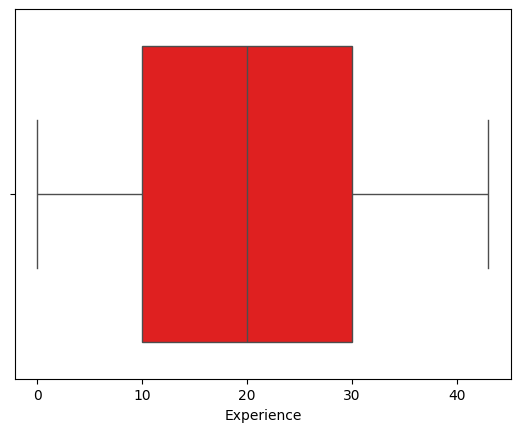

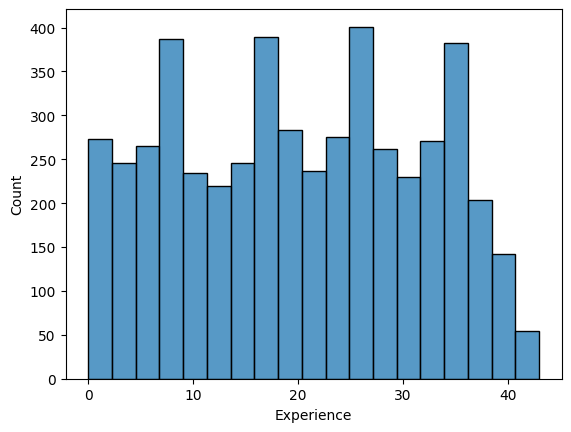

In [ ]:
sns.boxplot(data=df,x='Experience',color='red');
plt.show()
sns.histplot(data=df,x='Experience');
plt.show()
#From the below plots, we can see that it is a very slight right skewed distribution but mostly normal

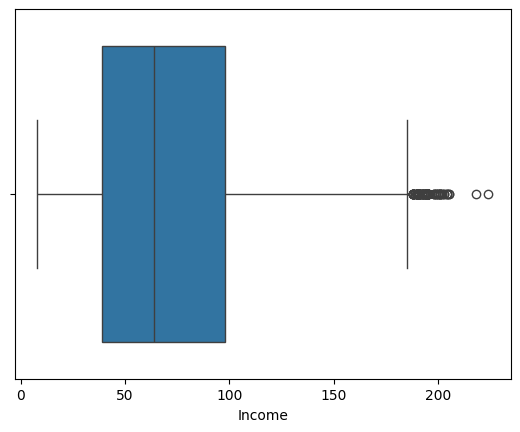

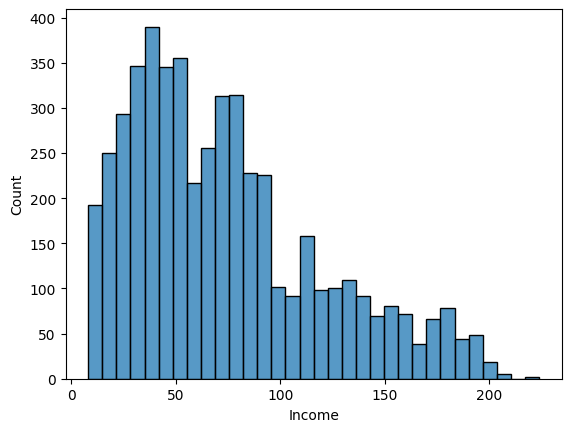

In [ ]:
sns.boxplot(data=df,x='Income');
plt.show()
sns.histplot(data=df,x='Income');
plt.show()
# From the below plots, we can say that there are outliers in the income column and data is right skewed one

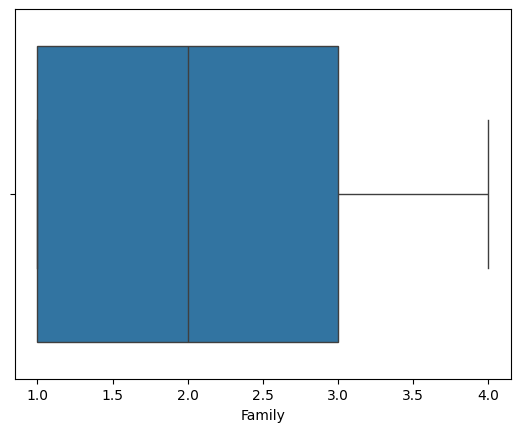

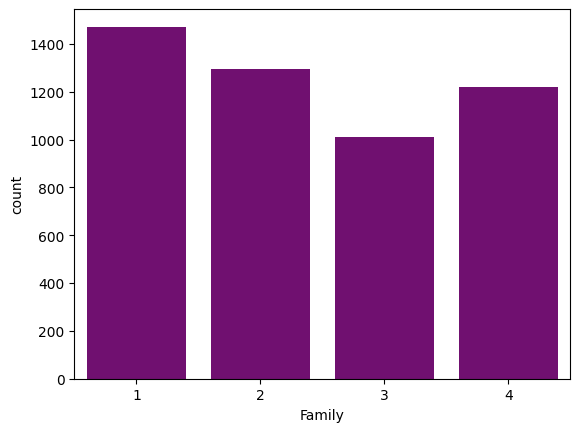

In [ ]:
sns.boxplot(data=df,x='Family');
plt.show()
# better to use bargraph since it depicts how many rows are equal to each category
sns.countplot(data=df,x='Family',color='purple');
plt.show()
#from the below plot, we can see that its right skewed distribution and median is 2 people per family

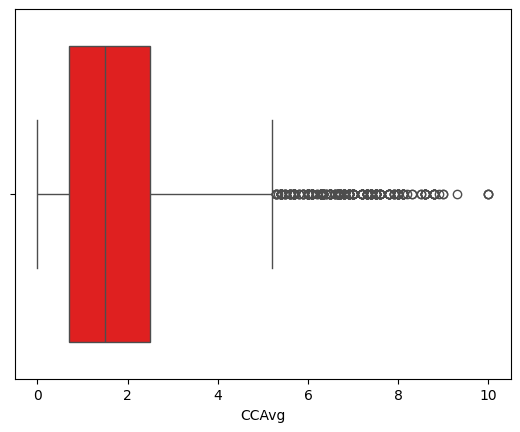

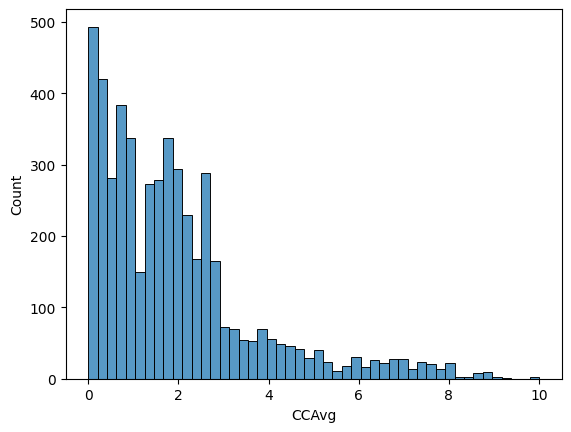

In [ ]:
sns.boxplot(data=df,x='CCAvg',color='red');
plt.show()
sns.histplot(data=df,x='CCAvg');
plt.show()
#With the below plots, there are definitely outliers and since right whisker is bigger than left one, we can determine that its a right skewed distribution

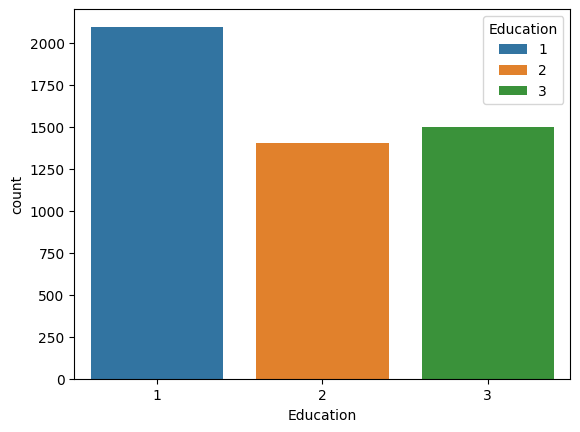

In [ ]:
sns.countplot(data=df,x='Education',hue="Education");
plt.show()
#From the below countplot, we can say that there are about equal no of graduates and professional customers but definitely more on the undergrads

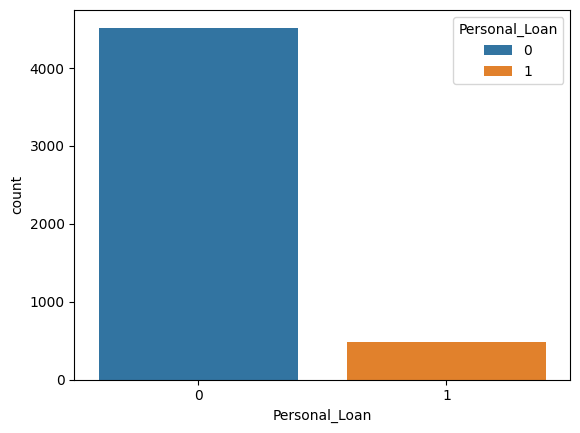

In [ ]:
sns.countplot(data=df,x='Personal_Loan',hue='Personal_Loan');
plt.show()
#There are many customers which didnt avail the personal loan in the last campaign

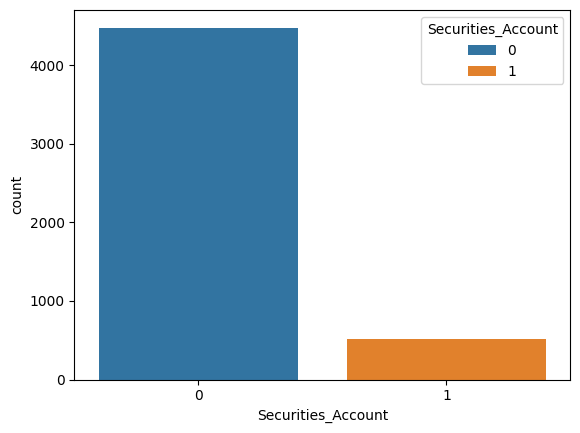

In [ ]:
sns.countplot(data=df,x='Securities_Account',hue='Securities_Account');
plt.show()
#We can see that there are many customers didnt have a security account with the bank

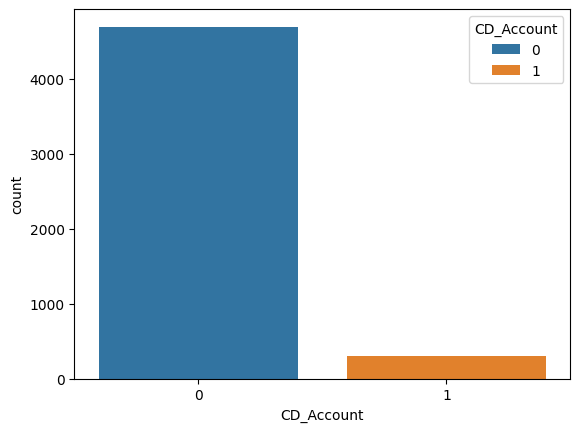

In [ ]:
sns.countplot(data=df,x='CD_Account',hue='CD_Account');
plt.show()
#Likewise, with CD Account too just like Securities Account

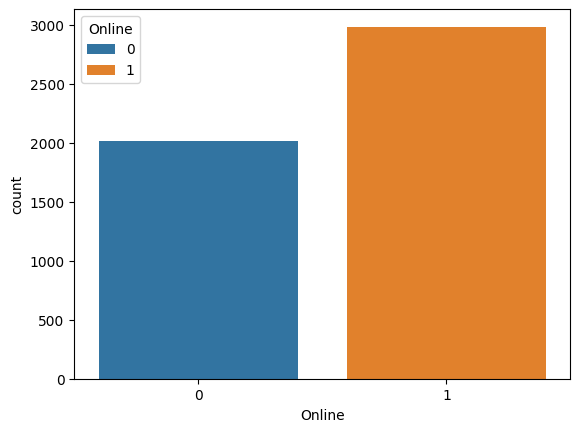

In [ ]:
sns.countplot(data=df,x='Online',hue='Online');
plt.show()
#Many customers are using internet banking facilities however customers who dont use the internet banking facilities are significantly higher too

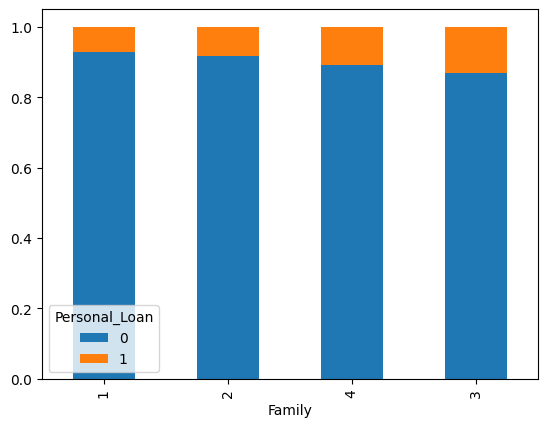

In [ ]:
output = pd.crosstab(df['Family'], df['Personal_Loan'], normalize="index").sort_values(by=1, ascending=True)
output.plot(kind='bar', stacked=True)
plt.show()
#This clearly depicts that customers who has a family of at least 3 or more have availed personal loan

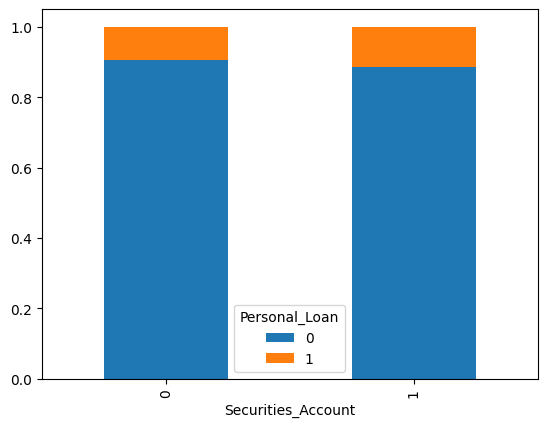

In [ ]:
output = pd.crosstab(df['Securities_Account'], df['Personal_Loan'], normalize="index").sort_values(by=0, ascending=False)
output.plot(kind='bar', stacked=True)
plt.show()
#This shows that securities account hasnt played much role as both customers have taken personal loan but fractionally more customers with securities account

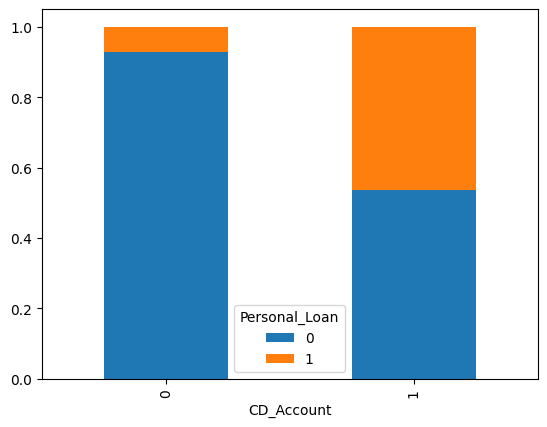

In [ ]:
output = pd.crosstab(df['CD_Account'], df['Personal_Loan'], normalize="index").sort_values(by=0, ascending=False)
output.plot(kind='bar', stacked=True)
plt.show()
#This shows clear indication that customers who have CD Account have availed personal loan more than customers who do not own a CD account

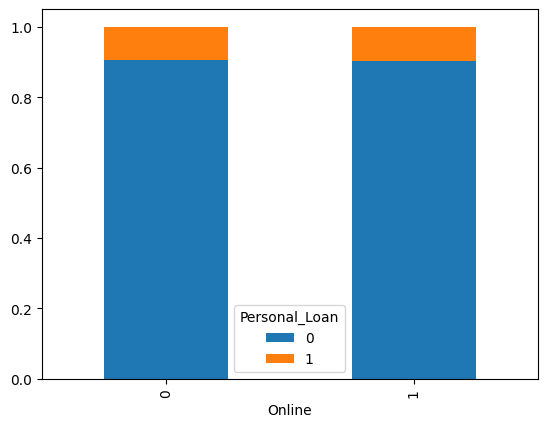

In [ ]:
output = pd.crosstab(df['Online'], df['Personal_Loan'], normalize="index").sort_values(by=0, ascending=False)
output.plot(kind='bar', stacked=True)
plt.show()
#This plot shows that Online or offline customers have made very trivial impact on the personal loan

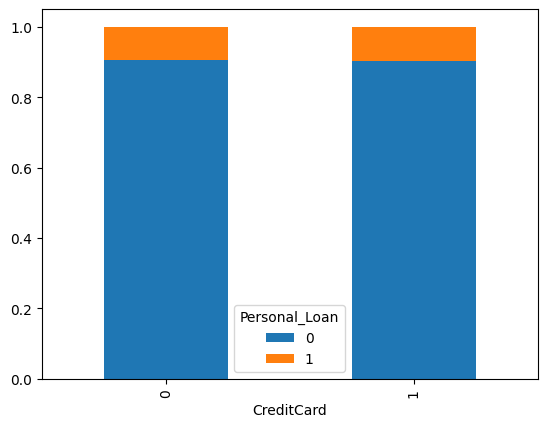

In [ ]:
output = pd.crosstab(df['CreditCard'], df['Personal_Loan'], normalize="index").sort_values(by=0, ascending=False)
output.plot(kind='bar', stacked=True)
plt.show()

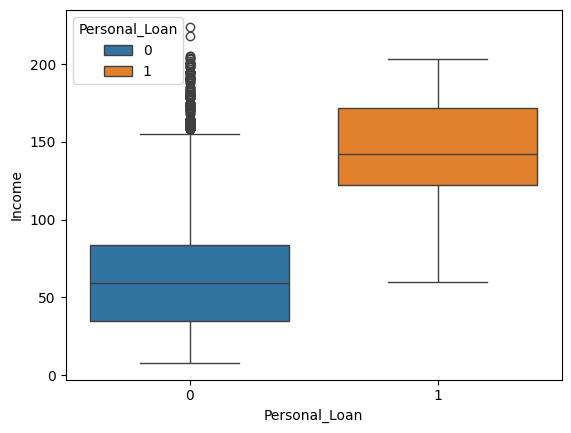

In [ ]:
sns.boxplot(data=df,x='Personal_Loan',y='Income',hue='Personal_Loan')
plt.show()
#This graph shows that annual income over 100$ are interested to avail personal loan- Definitely outliers on customers who didnt avail loan

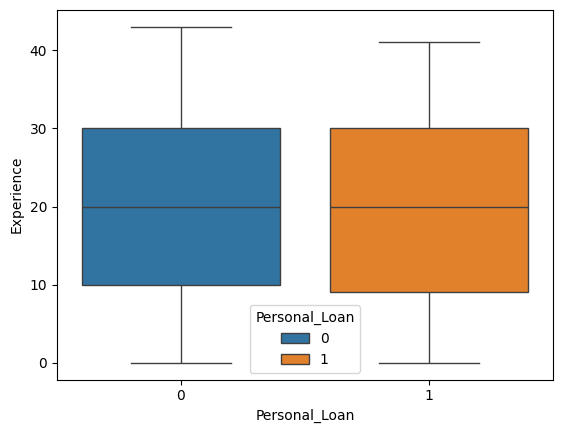

In [ ]:
sns.boxplot(data=df,x='Personal_Loan',y='Experience',hue='Personal_Loan')
plt.show()
#This depicts that there are equal no of customers who availed personal loan at around same years of experience

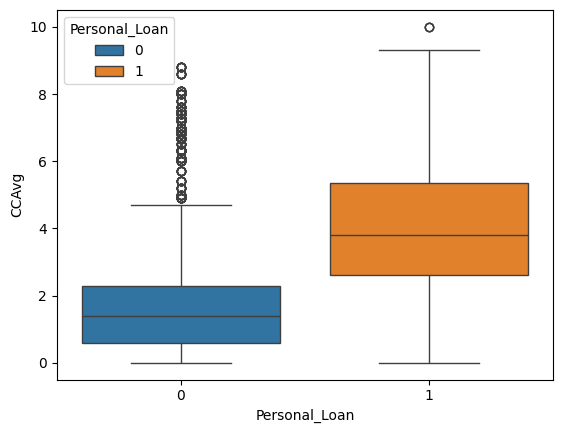

In [ ]:
sns.boxplot(data=df,x='Personal_Loan',y='CCAvg',hue='Personal_Loan')
plt.show()
#This one is a very interesting one! Customers who spent high on credit card have availed more personal loan- median value is around 4k$ spent and they take perosnal loan more

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


In [ ]:
#Not selecting Experience as it is correlated as depicted above and Personal Loan as target variable
X=df[['Age','Income','ZIPCode','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
Y=df['Personal_Loan']
OneHotencode = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = OneHotencode.astype(float)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
print(X_train.shape)#70% of 5000 rows which is 3500
print(X_test.shape)#30% of 5000 rows is 1500
print(Y_train.value_counts()) #likewise for train personal loan column 0's are 3169 and 1s are 331
print(Y_test.value_counts())

(3500, 17)
(1500, 17)
Personal_Loan
0    3169
1     331
Name: count, dtype: int64
Personal_Loan
0    1351
1     149
Name: count, dtype: int64


## Model Building

### Model Building

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)


DecisionTreeClassifier()

### Model Evaluation Criterion

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print("Accuracy score for trained model is: ", accuracy_score(Y_train,y_pred_train))
print("Accuracy score for test model before best params is: ", accuracy_score(Y_test,y_pred_test))
print("Recall score for trained model is: ", recall_score(Y_train,y_pred_train,average='macro'))
print("Recall score for test model before best params is: ", recall_score(Y_test,y_pred_test,average='macro'))
print("Precision score for trained model is: ", precision_score(Y_train,y_pred_train))
print("Precision score for test model before best params is: ", precision_score(Y_test,y_pred_test))
print("F1 score for trained model is: ", f1_score(Y_train,y_pred_train))
print("F1 score for test model before best params is: ", f1_score(Y_test,y_pred_test))
#Since both scores are high and close to each other, i believe its accurate but not either overfitting or underfitting

Accuracy score for trained model is:  1.0
Accuracy score for test model before best params is:  0.9846666666666667
Recall score for trained model is:  1.0
Recall score for test model before best params is:  0.9526748766759894
Precision score for trained model is:  1.0
Precision score for test model before best params is:  0.9315068493150684
F1 score for trained model is:  1.0
F1 score for test model before best params is:  0.9220338983050848


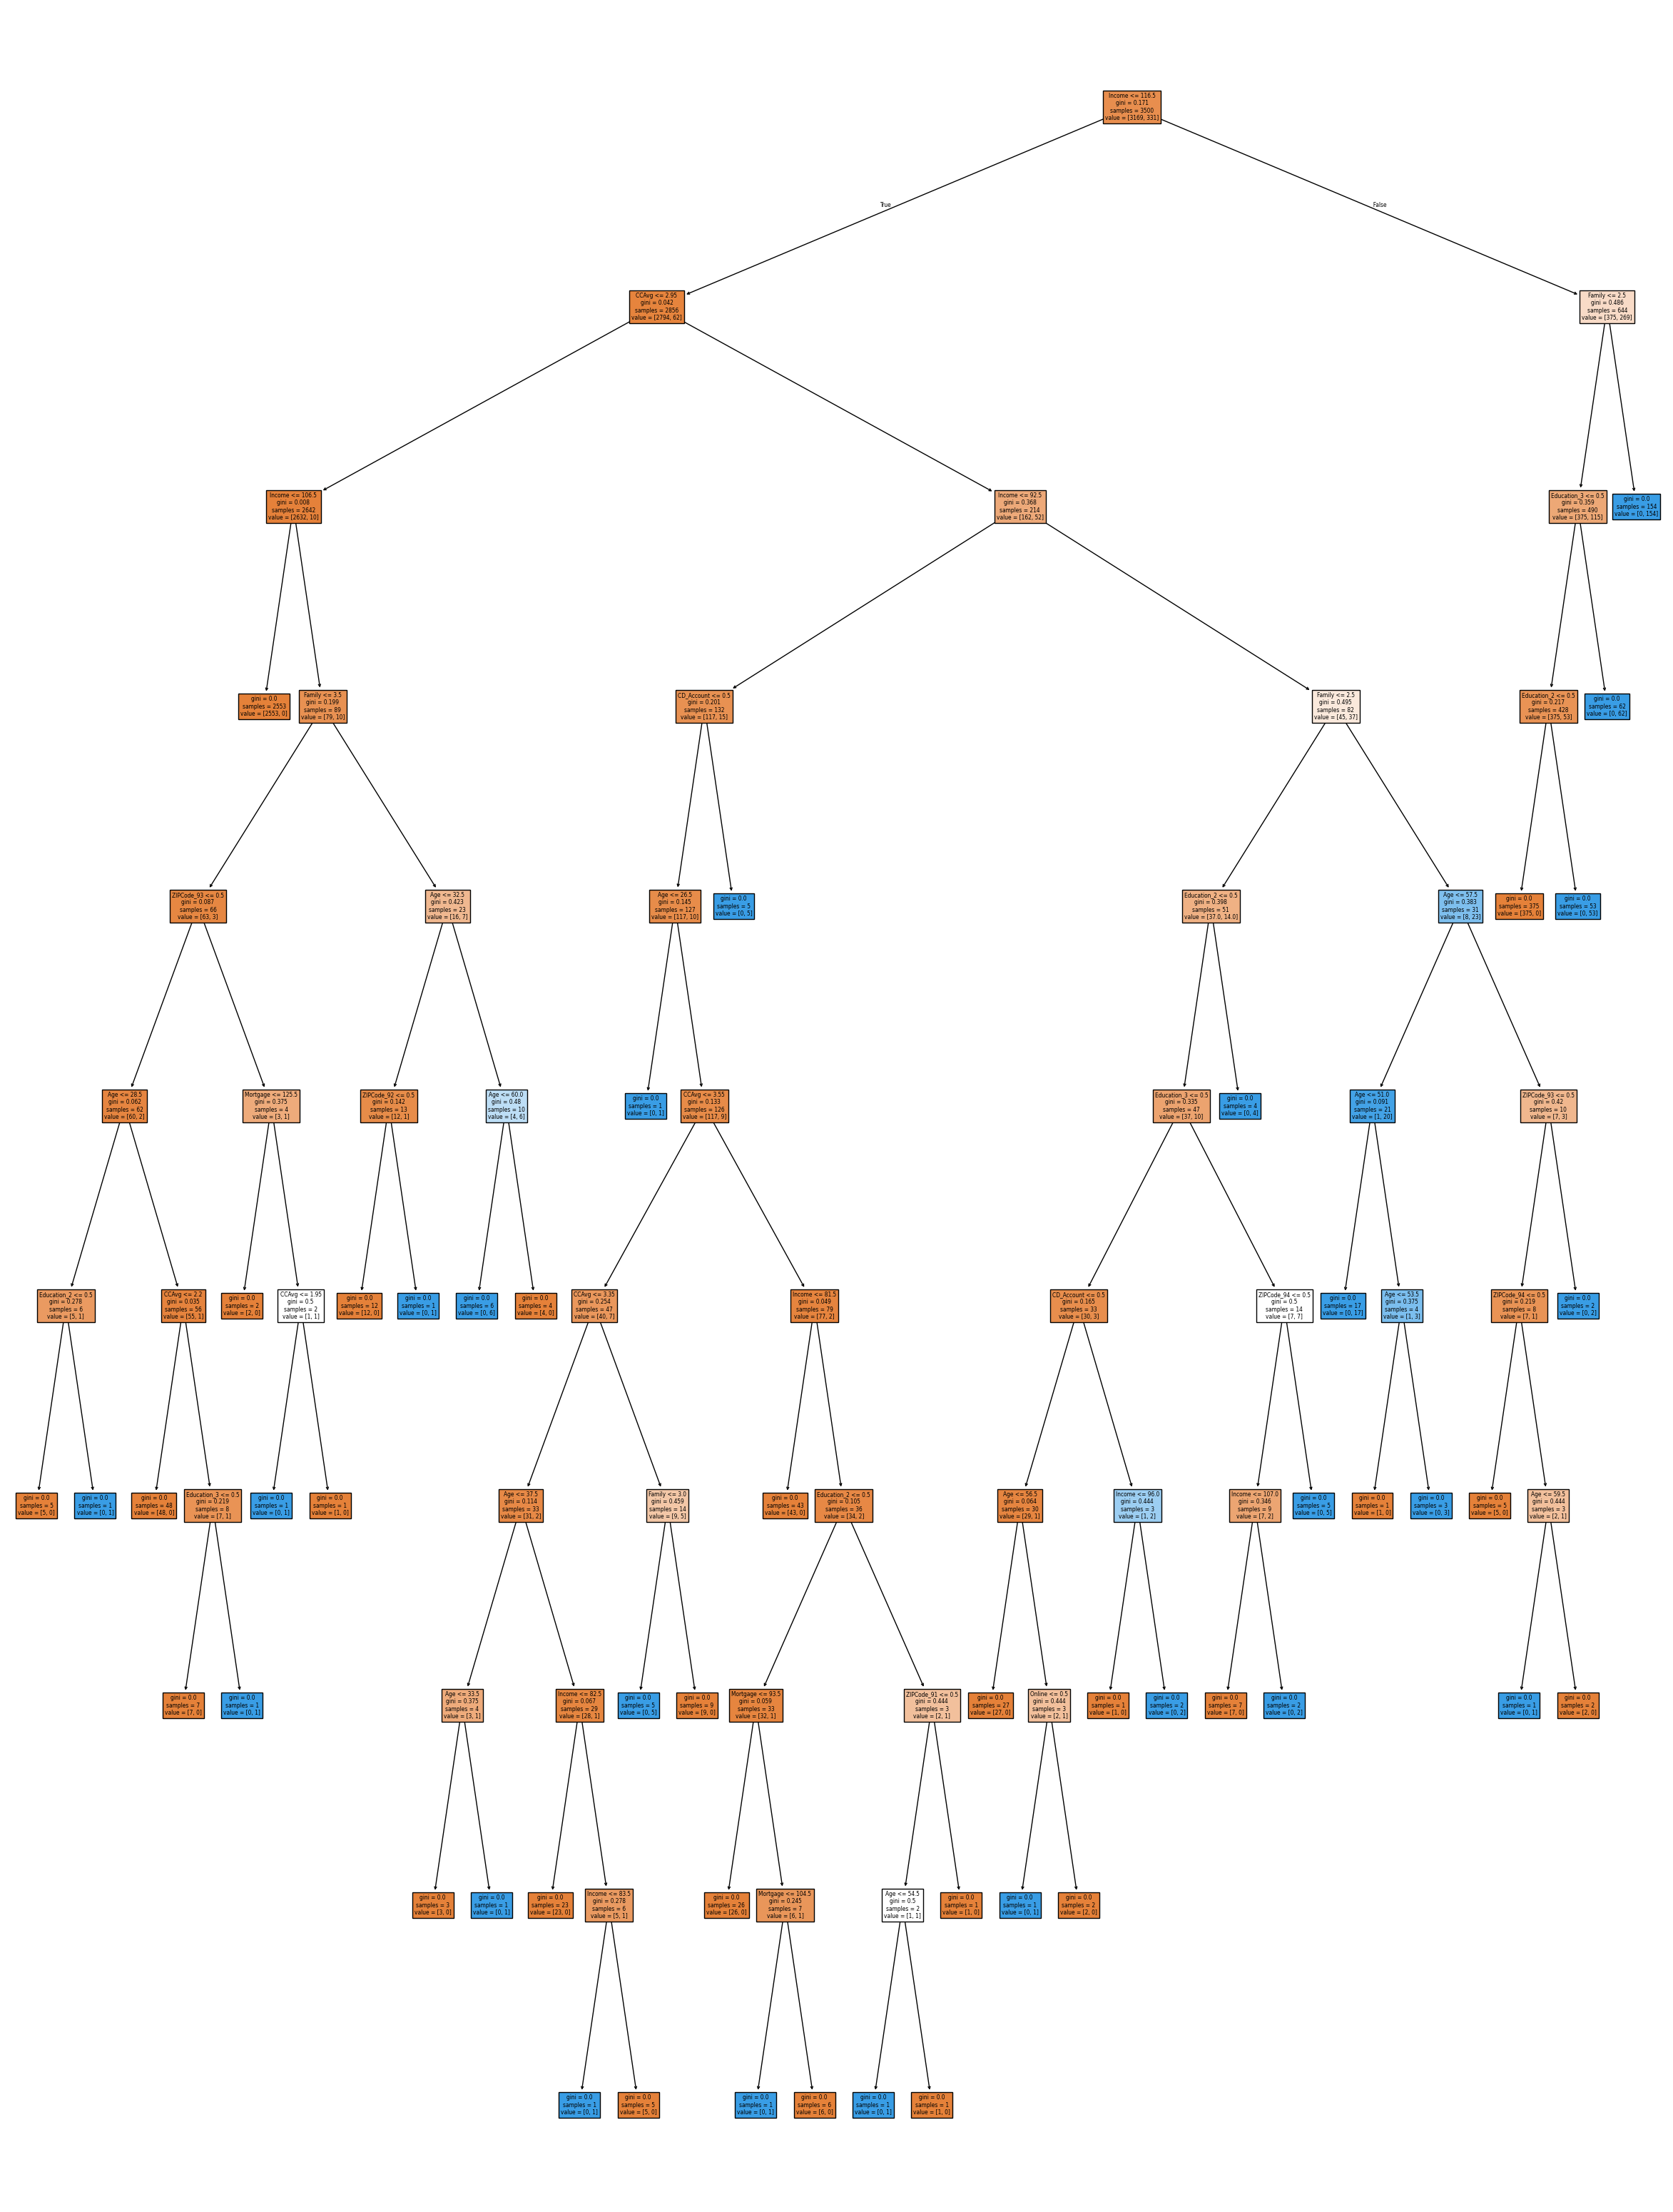

In [ ]:
plt.figure(figsize=(30, 40))
plot_tree(model,feature_names=X_train.columns,filled=True)
plt.show()

In [ ]:
cm=confusion_matrix(Y_train,y_pred_train)
cm

array([[3169,    0],
       [   0,  331]])

In [ ]:
cm=confusion_matrix(Y_test,y_pred_test)
cm

array([[1341,   10],
       [  13,  136]])

## Model Performance Improvement

In [ ]:
param_grid = {
    'max_depth': [2,4,6],
    'max_leaf_nodes': [50,75,100,125,150],
    'min_samples_leaf': [10,20,30,40,50]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best recall score is:", grid_search.best_score_)

Best parameters: {'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}
Best recall score is: 0.9817142857142857


In [ ]:
model=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=50,min_samples_leaf=10,random_state=40,class_weight='balanced')
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_leaf=10, random_state=40)

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [ ]:
cm_After=confusion_matrix(Y_train,y_pred_train)
cm_After

array([[3066,  103],
       [   1,  330]])

In [ ]:
cm_AfterPrepruning=confusion_matrix(Y_test,y_pred_test)
cm_AfterPrepruning

array([[1298,   53],
       [   9,  140]])

In [ ]:
print("Recall score for test model after best params is: ", recall_score(Y_test,y_pred_test,average='macro'))
print("F1 score for test model after params for pre pruning is: ", f1_score(Y_test,y_pred_test))

Recall score for test model after best params is:  0.95018355779214
F1 score for test model after params for pre pruning is:  0.8187134502923976


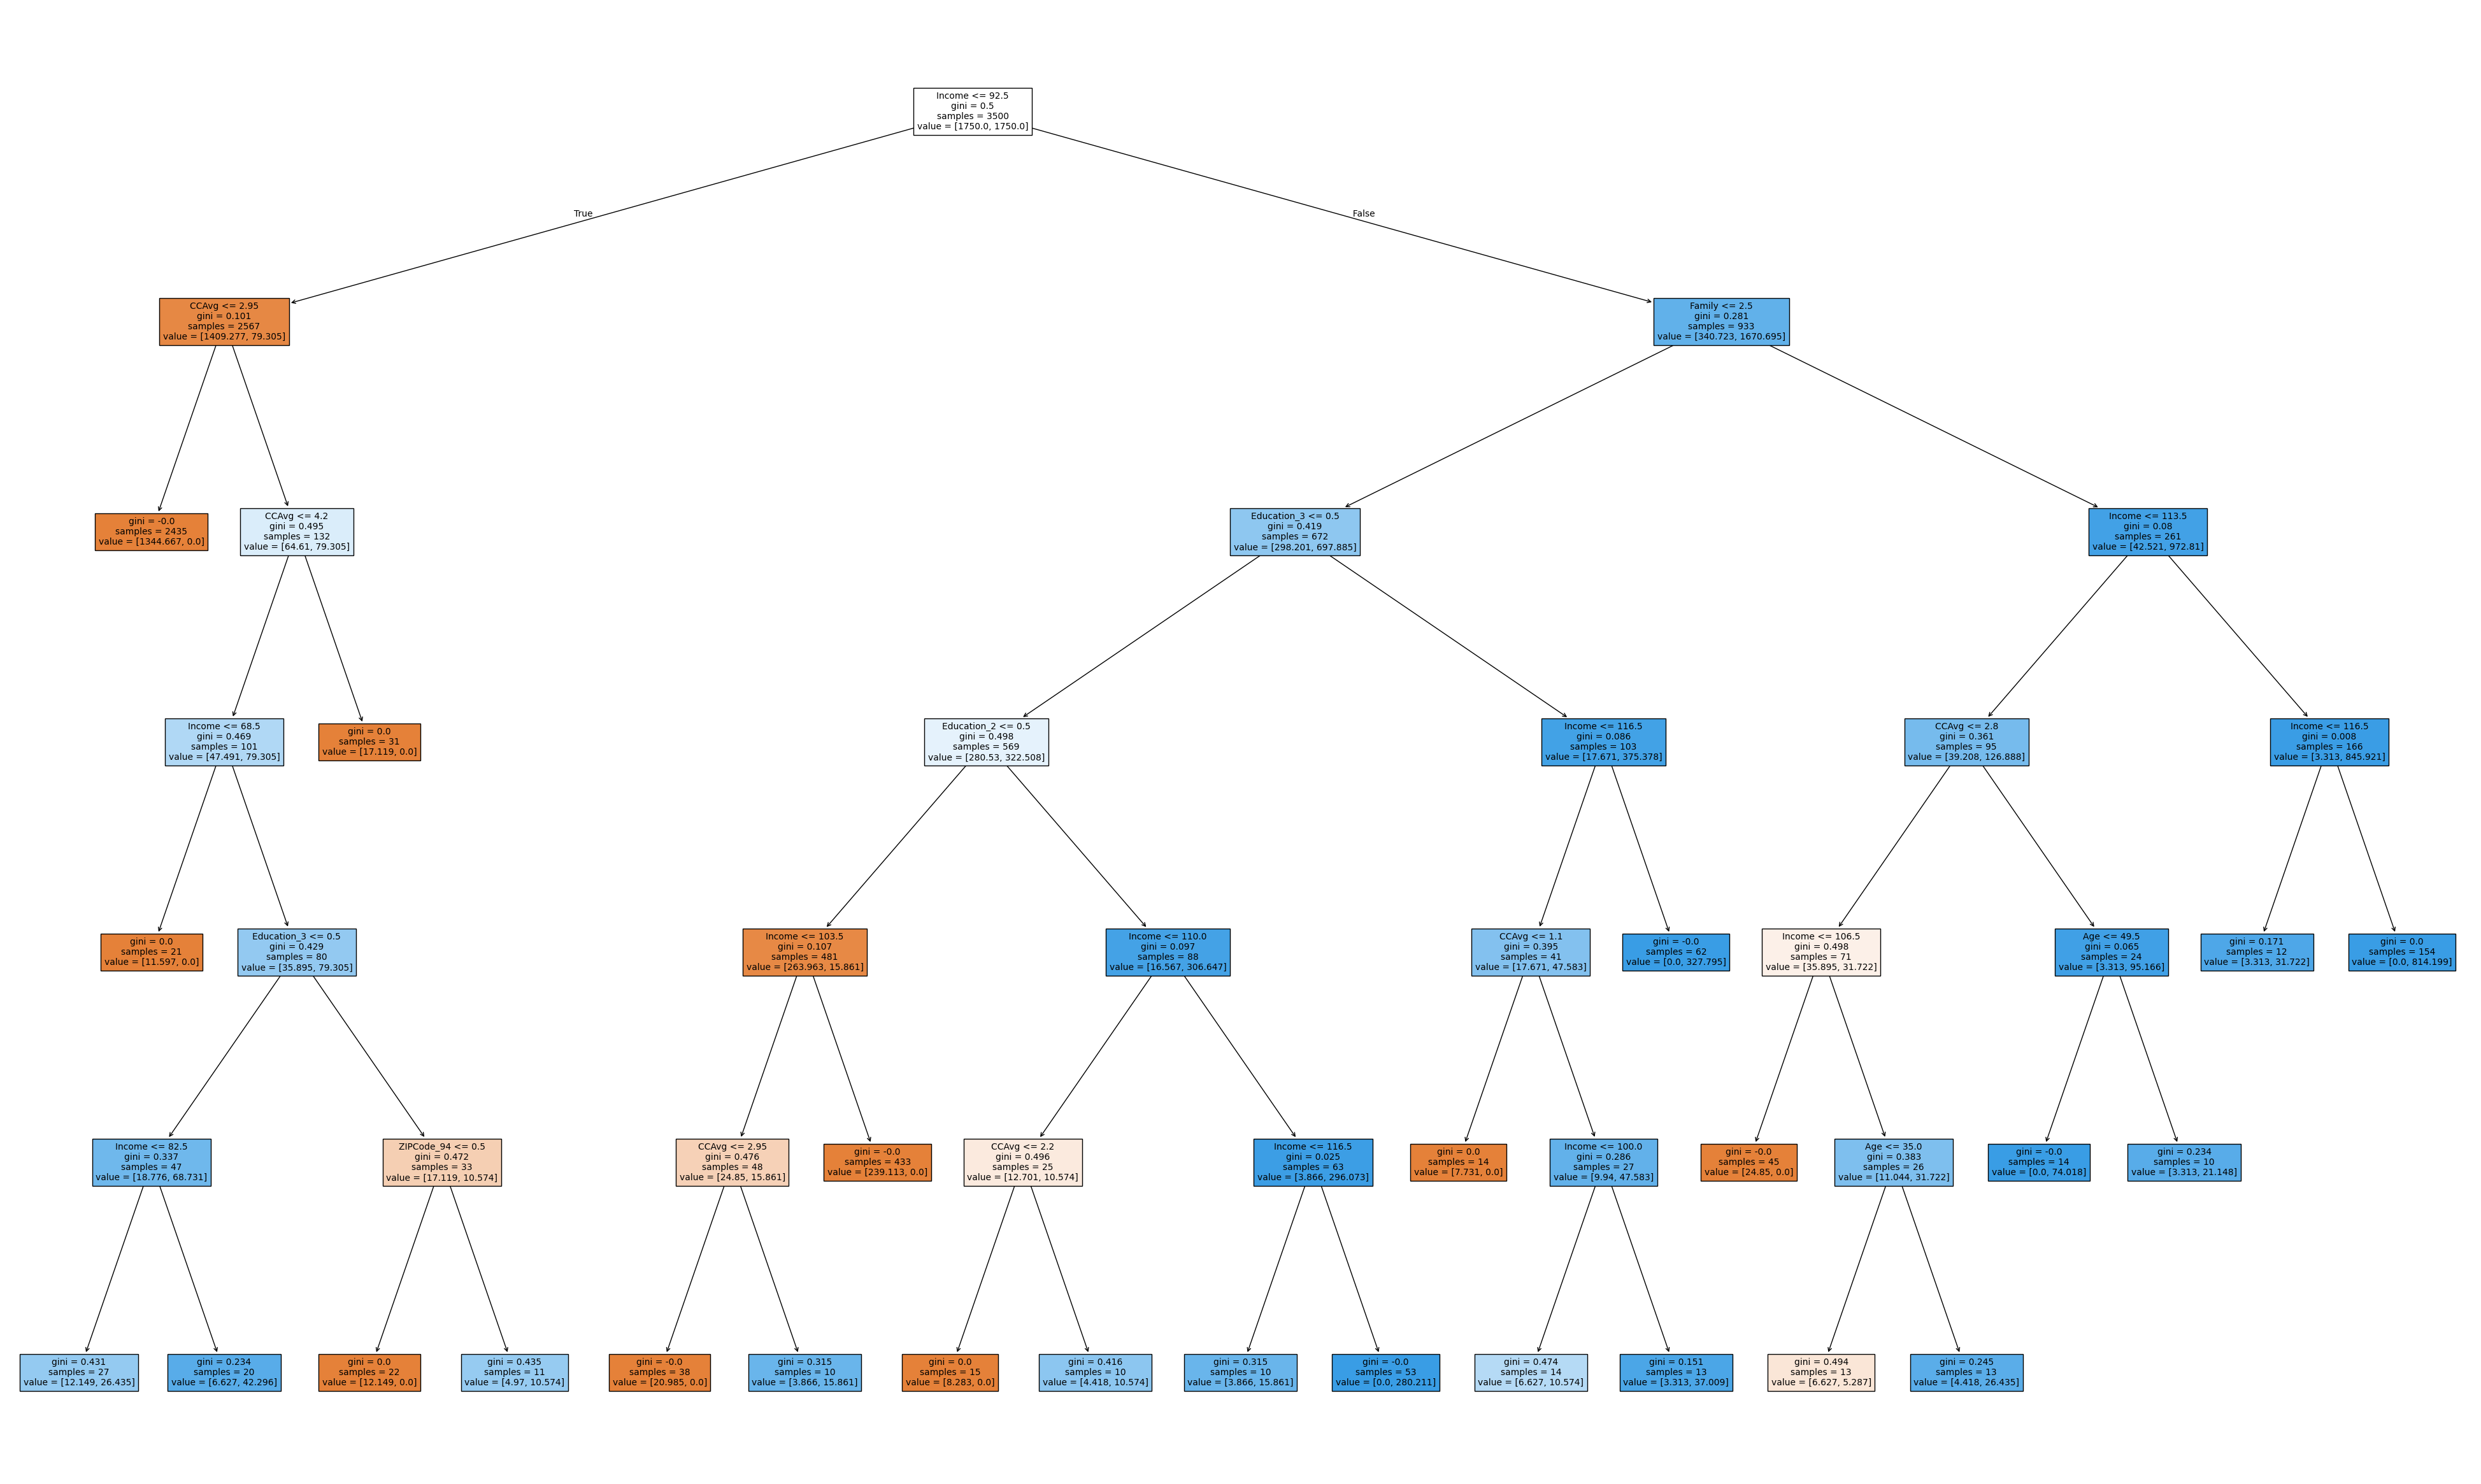

In [ ]:
plt.figure(figsize=(50, 30))
plot_tree(model,feature_names=X_train.columns,filled=True,fontsize=10)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

In [ ]:
for clf in clfs:
  train_Scores=clf.score(X_train,Y_train)
  test_Scores=clf.score(X_test,Y_test)
print(train_Scores)
print(test_Scores)

0.9054285714285715
0.9006666666666666


## Model Performance Comparison and Final Model Selection

In [ ]:
print("Recall score for test model after best params is: ", recall_score(Y_test,y_pred_test,average='macro'))
print("F1 score for test model after params for pre pruning is: ", f1_score(Y_test,y_pred_test))

Recall score for test model after best params is:  0.95018355779214
F1 score for test model after params for pre pruning is:  0.8187134502923976


In [ ]:
y_pred_train_post=clf.predict(X_train)
y_pred_test_post=clf.predict(X_test)

In [ ]:
print("Recall score for test model after post pruning  is: ", recall_score(Y_test,y_pred_test_post,average='macro'))
print("F1 score for test model after params for post pruning is: ", f1_score(Y_test,y_pred_test_post))

Recall score for test model after post pruning  is:  0.5
F1 score for test model after params for post pruning is:  0.0


With this above scores, its clearly giving an impression to go for pre pruning model since it has more f1 score value which indicates harmonic mean. At the end of the day we want to higher recall score too so that it would not show the customer that doesnt take personal loan ended up taking the loan.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?





1.   customers who has a family of at least 3 or more likely to avail personal loan

2.   securities account hasnt played much role as both customers have taken personal loan but fractionally more customers with securities account, hence securities account wouldnt play a huge role

3. Age doesnt play a huge role as well and there will be a equal likelihood of customers availing personal loan.
4. It shows clear indication that customers who have CD Account have availed personal loan more than customers who do not own a CD account
5. Customers who has an education higher than undergraduate degree must be a target to get personal loan as historic data depict.
6. Also data shows that annual income over 100$ are interested to avail personal loan



___